# Play with the weather Data with non-sibscriber data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in non-subscriber data and weather data
cust = pd.read_csv('./data/processed/nonsubscribers_1.csv')
weather = pd.read_csv('./data/downloaded/weather.csv')

In [3]:
# Create two columns to hold date in %Y%m%d format
cust['start_date'] = pd.to_datetime(cust['Start Time'], infer_datetime_format=True).dt.strftime('%Y%m%d')
cust['end_date'] = pd.to_datetime(cust['Start Time'], infer_datetime_format=True).dt.strftime('%Y%m%d')

In [4]:
# Slice weather data, convert DATE to strings to prepare for merging
weather = weather[['STATION_NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 
                                    'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND']]
weather['DATE'] = weather['DATE'].astype(str)

In [5]:
# Merge the weather information to customer data
#cust2 = cust[['start_date', 'end_date']].merge(weather, how='left', left_on='start_date', right_on='DATE')

In [6]:
#cust2.head(5)

In [7]:
c1 = cust.groupby('start_date').size().reset_index(name='usage')

In [8]:
c2 = c1.merge(weather, how='left', left_on='start_date', right_on='DATE')
c2.head(3)

,start_date,usage,STATION_NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND
0,20160401,3130,NY CITY CENTRAL PARK NY US,40.77889,-73.96917,20160401,0.5,0.0,0.0,26.1,16.1,3.0
1,20160402,3132,NY CITY CENTRAL PARK NY US,40.77889,-73.96917,20160402,4.1,0.0,0.0,16.1,9.4,2.2
2,20160403,1428,NY CITY CENTRAL PARK NY US,40.77889,-73.96917,20160403,2.3,0.0,0.0,10.0,1.1,5.7


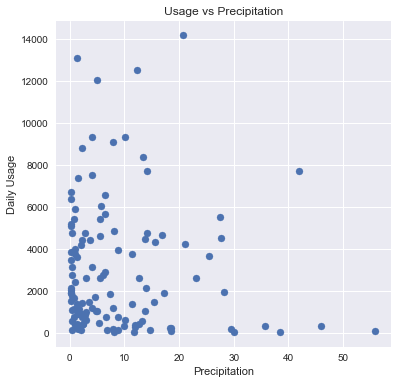

In [9]:
c2_prcp = c2[c2.PRCP > 0]
plt.figure(figsize=(6,6))
plt.scatter(c2_prcp.PRCP, c2_prcp.usage)
plt.title('Usage vs Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Daily Usage')

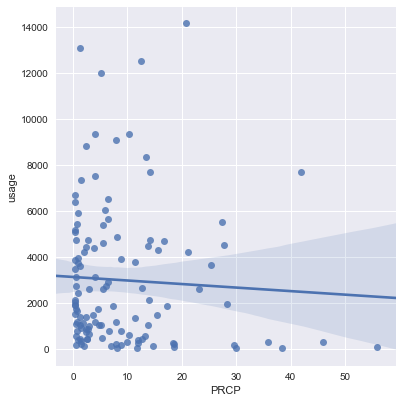

In [10]:
sns.lmplot('PRCP', 'usage', c2_prcp, size=5.7)

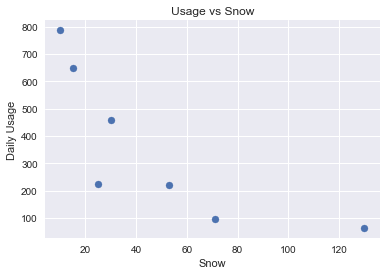

In [11]:
c2_snow = c2[c2.SNOW > 0]
plt.scatter(c2_snow.SNOW, c2_snow.usage)
plt.title('Usage vs Snow')
plt.xlabel('Snow')
plt.ylabel('Daily Usage')

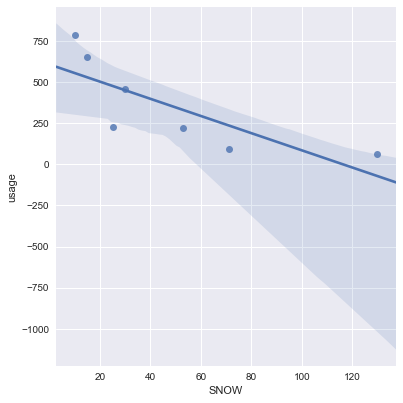

In [12]:
sns.lmplot('SNOW', 'usage', c2_snow, size=5.7)

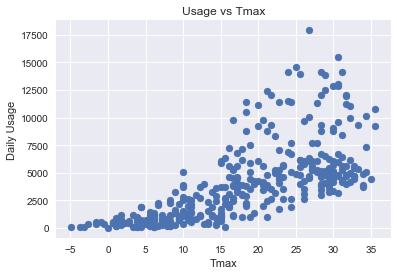

In [13]:
plt.scatter(c2.TMAX, c2.usage)
plt.title('Usage vs Tmax')
plt.xlabel('Tmax')
plt.ylabel('Daily Usage')

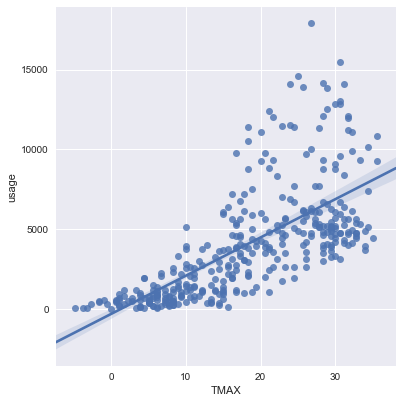

In [14]:
sns.lmplot('TMAX', 'usage', c2, size=5.7)

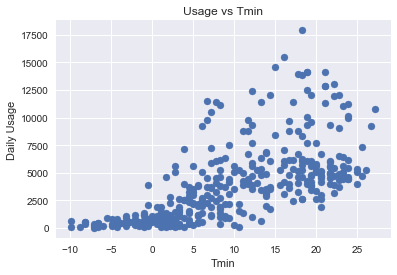

In [15]:
plt.scatter(c2.TMIN, c2.usage)
plt.title('Usage vs Tmin')
plt.xlabel('Tmin')
plt.ylabel('Daily Usage')

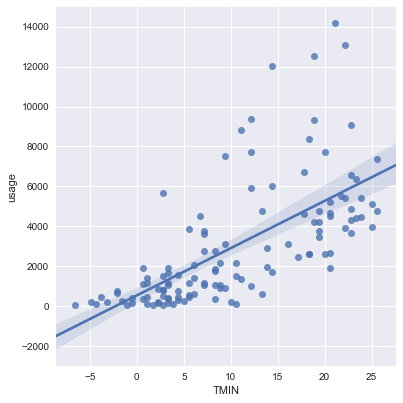

In [16]:
sns.lmplot('TMIN', 'usage', c2_prcp, size=5.7)

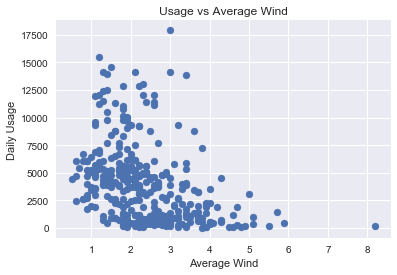

In [17]:
c2_wind = c2[c2.AWND > 0]
plt.scatter(c2_wind.AWND, c2_wind.usage)
plt.title('Usage vs Average Wind')
plt.xlabel('Average Wind')
plt.ylabel('Daily Usage')

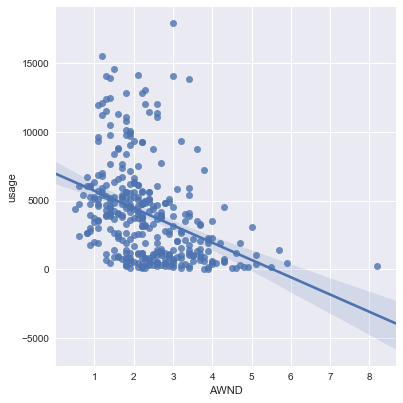

In [18]:
sns.lmplot('AWND', 'usage', c2_wind, size=5.7)